<a href="https://colab.research.google.com/github/khaloodi/DS-Unit-2-Classification-1/blob/master/Tanzania_Water_Pumps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

In [0]:
import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

In [0]:
train_features.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [0]:
train_labels.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [0]:
test_features.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


In [0]:
sample_submission.head(3)

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional


In [0]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
train_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


### Get majority class baseline

[Will Koehrsen](https://twitter.com/koehrsen_will/status/1088863527778111488)

> A baseline for classification can be the most common class in the training dataset.

[*Data Science for Business*](https://books.google.com/books?id=4ZctAAAAQBAJ&pg=PT276), Chapter 7.3: Evaluation, Baseline Performance, and Implications for Investments in Data

> For classification tasks, one good baseline is the _majority classifier_, a naive classifier that always chooses the majority class of the training dataset (see Note: Base rate in Holdout Data and Fitting Graphs). This may seem like advice so obvious it can be passed over quickly, but it is worth spending an extra moment here. There are many cases where smart, analytical people have been tripped up in skipping over this basic comparison. For example, an analyst may see a classification accuracy of 94% from her classifier and conclude that it is doing fairly well—when in fact only 6% of the instances are positive. So, the simple majority prediction classifier also would have an accuracy of 94%. 

**Determine Majority Class:**

In [0]:
train_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [0]:
y_train = train_labels['status_group']
y_train.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [0]:
y_train.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

#### What if we guessed the majority class for every prediction?

In [0]:
majority_class = y_train.mode()[0]

In [0]:
y_pred = [majority_class] * len(y_train)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_train, y_pred)

0.543080808080808

## Do train/validate/test split

#### We have two options for where we choose to split:
- Time
- Random

To split on time, we can use pandas.

To split randomly, we can use the [**`sklearn.model_selection.train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train = train_features
y_train = train_labels['status_group']

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
  X_train, y_train, train_size=0.80, test_size=0.20,
  stratify=y_train, random_state =42)

In [0]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [0]:
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [0]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

## Use scikit-learn for logistic regression

### Begin with baselines: fast, first models

#### Drop non-numeric features

In [0]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

#### Drop nulls if necessary

In [0]:
X_train_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

#### Fit Logistic Regresson on train data

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

In [0]:
model.fit(X_train_numeric, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate on validation data

In [0]:
model.predict(X_val_numeric)

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [0]:
y_pred = model.predict(X_val_numeric)
accuracy_score(y_val, y_pred)

0.5546296296296296

In [0]:
model.score(X_val_numeric, y_val)

0.5546296296296296

#### What predictions does a Logistic Regression return?

In [0]:
pd.Series(y_pred).value_counts()

functional        10800
non functional     1080
dtype: int64

In [0]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [0]:
y_pred_proba = model.predict_proba(X_val_numeric)
y_pred_proba

array([[0.49945889, 0.07419516, 0.42634595],
       [0.66388077, 0.08727128, 0.24884795],
       [0.5829407 , 0.07133899, 0.34572031],
       ...,
       [0.53203411, 0.06999972, 0.39796617],
       [0.65347997, 0.05874194, 0.28777809],
       [0.30706702, 0.02297016, 0.66996282]])

In [0]:
y_pred_proba.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [0]:
(y_pred_proba.sum(axis=1))==1

array([ True, False,  True, ...,  True,  True,  True])

In [0]:
proba_functional = y_pred_proba[:,0]
proba_functional

array([0.49945889, 0.66388077, 0.5829407 , ..., 0.53203411, 0.65347997,
       0.30706702])

In [0]:
proba_functional_needs_repair = y_pred_proba[:,1]
proba_functional_needs_repair

array([0.07419516, 0.08727128, 0.07133899, ..., 0.06999972, 0.05874194,
       0.02297016])

In [0]:
proba_non_functional = y_pred_proba[:,2]
proba_non_functional

array([0.42634595, 0.24884795, 0.34572031, ..., 0.39796617, 0.28777809,
       0.66996282])

In [0]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [0]:
pd.DataFrame({'Functional': proba_functional, 
              'Functional Needs Repair': proba_functional_needs_repair, 
              'Non Functional': proba_non_functional}).describe()

,Functional,Functional Needs Repair,Non Functional
count,11880.00,11880.00,11880.00
mean,0.54,0.07,0.38
std,0.09,0.04,0.08
min,0.27,0.00,0.00
25%,0.51,0.06,0.35
50%,0.54,0.07,0.39
75%,0.59,0.07,0.41
max,1.00,0.29,0.71


## Do one-hot encoding of categorical features

In [0]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.3MB/s 


In [0]:
import category_encoders as ce

### Check "cardinality" of categorical features

[Cardinality](https://simple.wikipedia.org/wiki/Cardinality) means the number of unique values that a feature has:
> In mathematics, the cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3. 

One-hot encoding adds a dimension for each unique value of each categorical feature. So, it may not be a good choice for "high cardinality" categoricals that have dozens, hundreds, or thousands of unique values. 

### Explore `quantity` feature

In [0]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [0]:
X_train['quantity'].value_counts(dropna=False)

enough          26567
insufficient    12153
dry              4921
seasonal         3244
unknown           635
Name: quantity, dtype: int64

In [0]:
X_train['quantity'].value_counts(dropna=False, normalize=True)

enough         0.56
insufficient   0.26
dry            0.10
seasonal       0.07
unknown        0.01
Name: quantity, dtype: float64

In [0]:
#Recombine X train and Y train for explanatory data analysis
train = X_train.copy()
train['status_group'] = y_train

#Now do groupby...
train.groupby('quantity')['status_group'].value_counts()

quantity      status_group           
dry           non functional              4762
              functional                   128
              functional needs repair       31
enough        functional                 17293
              non functional              7359
              functional needs repair     1915
insufficient  functional                  6333
              non functional              4652
              functional needs repair     1168
seasonal      functional                  1883
              non functional              1033
              functional needs repair      328
unknown       non functional               453
              functional                   170
              functional needs repair       12
Name: status_group, dtype: int64

In [0]:
#Recombine X train and Y train for explanatory data analysis
train = X_train.copy()
train['status_group'] = y_train

#Now do groupby...
train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional            0.97
              functional                0.03
              functional needs repair   0.01
enough        functional                0.65
              non functional            0.28
              functional needs repair   0.07
insufficient  functional                0.52
              non functional            0.38
              functional needs repair   0.10
seasonal      functional                0.58
              non functional            0.32
              functional needs repair   0.10
unknown       non functional            0.71
              functional                0.27
              functional needs repair   0.02
Name: status_group, dtype: float64

### Encode `quantity` feature

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train['quantity'])
encoded.head()

,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown
43360,1,0,0,0,0
7263,0,1,0,0,0
2486,1,0,0,0,0
313,0,1,0,0,0
52726,0,1,0,0,0


## Do one-hot encoding & Scale features, 
within a complete model fitting workflow.

### Why and how to scale features before fitting linear models

Scikit-Learn User Guide, [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
> Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

> The `preprocessing` module further provides a utility class `StandardScaler` that implements the `Transformer` API to compute the mean and standard deviation on a training set. The scaler instance can then be used on new data to transform it the same way it did on the training set.

### How to use encoders and scalers in scikit-learn
- Use the **`fit_transform`** method on the **train** set
- Use the **`transform`** method on the **validation** set


In [0]:
from sklearn.preprocessing import StandardScaler

categorical_features = ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

features

['quantity',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [0]:
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation accuracy ', model.score(X_val_scaled, y_val))

Validation accuracy  0.6579124579124579


### Get & plot coefficients

In [0]:
model.coef_

array([[ 0.02748456,  0.20453448, -0.40997646,  0.04581306, -0.00159188,
         0.24726122,  0.10363169,  0.04604089, -0.05603392,  0.00708643,
        -0.1722201 ,  0.09406163,  0.01112345, -0.05527931],
       [ 0.1192351 ,  0.04660743, -0.28314549,  0.08674043, -0.0937658 ,
         0.18014314,  0.04338193, -0.20846438, -0.05777954, -0.01265651,
         0.07653079, -0.06798033,  0.01135458, -0.04676952],
       [-0.14671966, -0.25114191,  0.69312195, -0.1325535 ,  0.09535769,
        -0.42740436, -0.14701362,  0.16242349,  0.11381346,  0.00557008,
         0.09568932, -0.0260813 , -0.02247803,  0.10204882]])

In [0]:
#getting coefficients for the 0 class
model.coef_[0]

array([ 0.02748456,  0.20453448, -0.40997646,  0.04581306, -0.00159188,
        0.24726122,  0.10363169,  0.04604089, -0.05603392,  0.00708643,
       -0.1722201 ,  0.09406163,  0.01112345, -0.05527931])

In [0]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

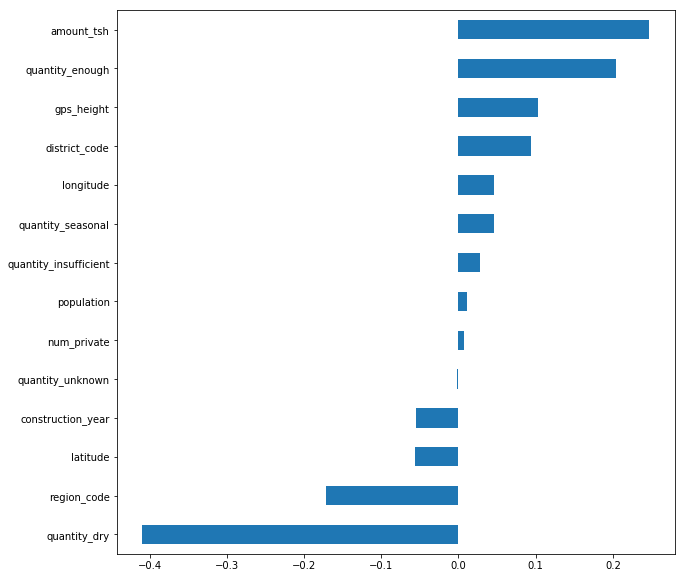

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh();

## Submit to predictive modeling competition


### Write submission CSV file

The format for the submission file is simply the row id and the predicted label (for an example, see `sample_submission.csv` on the data download page.

For example, if you just predicted that all the waterpoints were functional you would have the following predictions:

<pre>id,status_group
50785,functional
51630,functional
17168,functional
45559,functional
49871,functional
</pre>

Your code to generate a submission file may look like this: 
<pre># estimator is your scikit-learn estimator, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
</pre>

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)



In [0]:
all(X_test_encoded.columns == X_train_encoded.columns)

True

In [0]:
X_test_encoded.columns, X_train_encoded.columns

(Index(['quantity_insufficient', 'quantity_enough', 'quantity_dry',
        'quantity_seasonal', 'quantity_unknown', 'amount_tsh', 'gps_height',
        'longitude', 'latitude', 'num_private', 'region_code', 'district_code',
        'population', 'construction_year'],
       dtype='object'),
 Index(['quantity_insufficient', 'quantity_enough', 'quantity_dry',
        'quantity_seasonal', 'quantity_unknown', 'amount_tsh', 'gps_height',
        'longitude', 'latitude', 'num_private', 'region_code', 'district_code',
        'population', 'construction_year'],
       dtype='object'))

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.head(20)

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,functional
7,28965,non functional
8,36301,non functional
9,54122,functional


In [0]:
submission.to_csv('submission-01.csv', index=False)

In [0]:
!head submission-01.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
from google.colab import files
files.download('submission-01.csv')